In [16]:
%matplotlib inline
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

# Density functional and structure/diffusion of \[HOAc\]\[C$_1$Im\] (preview)

In [14]:
# previous analyses -- run2 (out of 0,1,2)
pre_pbe = "../exp/prod-adam-run2/analyses/cp2k"
pre_hicut = "../preview/analyses/nvt-hicut/cp2k/"
pre_scan = "../preview/analyses/nvt-scan/cp2k/"

## Diffusion coefficients

Text(0.5, 1.0, 'SCAN')

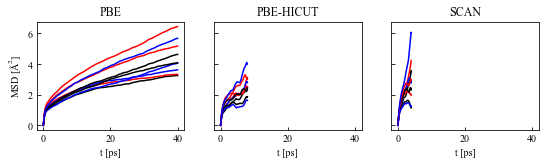

In [56]:
f, axs = plt.subplots(1, 3, figsize=[9, 2], sharex=True, sharey=True)
for pre, ax in zip([pre_pbe, pre_hicut, pre_scan], axs):
    systems = glob(f"{pre}/*-rho1.0753")
    ax.set_xlabel("t [ps]")
    for sys in systems:
        msd = np.load(f"{sys}/msd-10-110ps/msd.npy")
        ax.plot(msd[:, 0], msd[:, 1], color="k")
        ax.plot(msd[:, 0], msd[:, 2], color="r")
        ax.plot(msd[:, 0], msd[:, 3], color="b")

axs[0].set_ylabel("MSD [$\AA^2$]")
axs[0].set_title("PBE")
axs[1].set_title("PBE-HICUT")
axs[2].set_title("SCAN")

## RDF

Text(0.5, 1.0, 'SCAN')

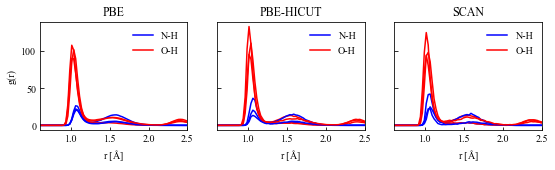

In [59]:
f, axs = plt.subplots(1, 3, figsize=[9, 2], sharex=True, sharey=True)
for pre, ax in zip([pre_pbe, pre_hicut, pre_scan], axs):
    systems = glob(f"{pre}/*-rho1.0753")
    ax.set_xlim([0.6, 2.5])
    ax.set_xlabel("r [$\AA$]")
    for sys in systems:
        rdf = np.loadtxt(f"{sys}/rdf-10-110ps/HN_rdf.dat")
        (l1,) = ax.plot(rdf[:, 0], rdf[:, 1], color="b")
        rdf = np.loadtxt(f"{sys}/rdf-10-110ps/HO_rdf.dat")
        (l2,) = ax.plot(rdf[:, 0], rdf[:, 1], color="r")
    ax.legend([l1, l2], ["N-H", "O-H"])

axs[0].set_ylabel("g(r)")
axs[0].set_title("PBE")
axs[1].set_title("PBE-HICUT")
axs[2].set_title("SCAN")

## HB structure wrt. time

Text(0.5, 1.0, 'SCAN')

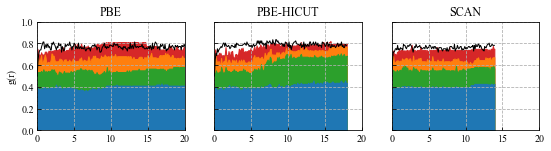

In [70]:
window = 1

f, axs = plt.subplots(1, 3, figsize=[9, 2], sharex=True, sharey=True)


for pre, ax in zip([pre_pbe, pre_hicut, pre_scan], axs):
    files = glob(f"{pre}/*-rho1.0753/hbnet.dat")
    hbnet =  [np.loadtxt(data) for data in files]
    hbnet = np.array(hbnet)
    t = hbnet[0,::window,0]
    molperc = hbnet[:,:,1].reshape([hbnet.shape[0],-1,window])/32.
    molperc = molperc.mean(axis=2)
    hbpop = hbnet[:,:,3:].cumsum(axis=2)/64.
    hbpop = hbpop.reshape([hbpop.shape[0],-1,window,hbpop.shape[-1]]).mean(axis=2)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
    for x, color in list(zip(hbpop.T, colors))[::-1]:
        h = ax.fill_between(t, x.mean(axis=1), color=color, alpha=1)
    l, = ax.plot(t, molperc.mean(axis=0), 'k-', lw=1)
    ax.grid()
    ax.set_xlim(0,20)
    ax.set_ylim(0,1)

axs[0].set_ylabel("g(r)")
axs[0].set_title("PBE")
axs[1].set_title("PBE-HICUT")
axs[2].set_title("SCAN")